<a href="https://colab.research.google.com/github/meryreddoor/yogagame_/blob/primeraRama/Cropping_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

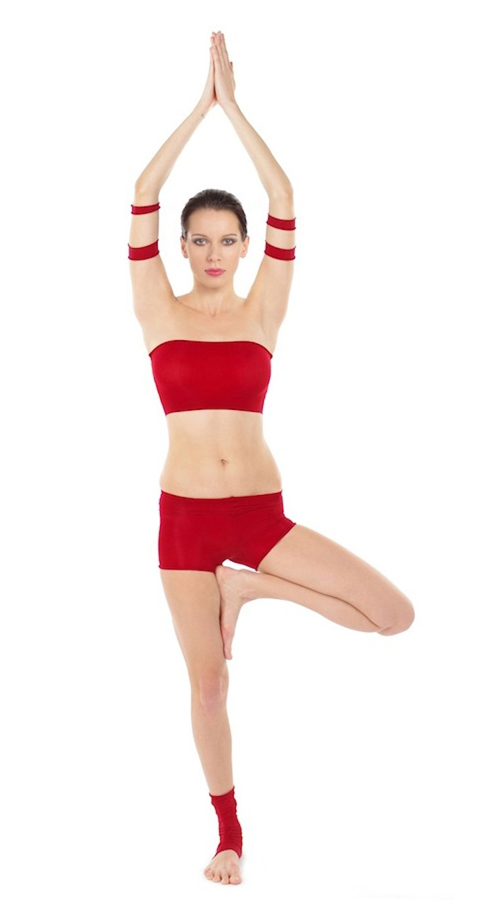

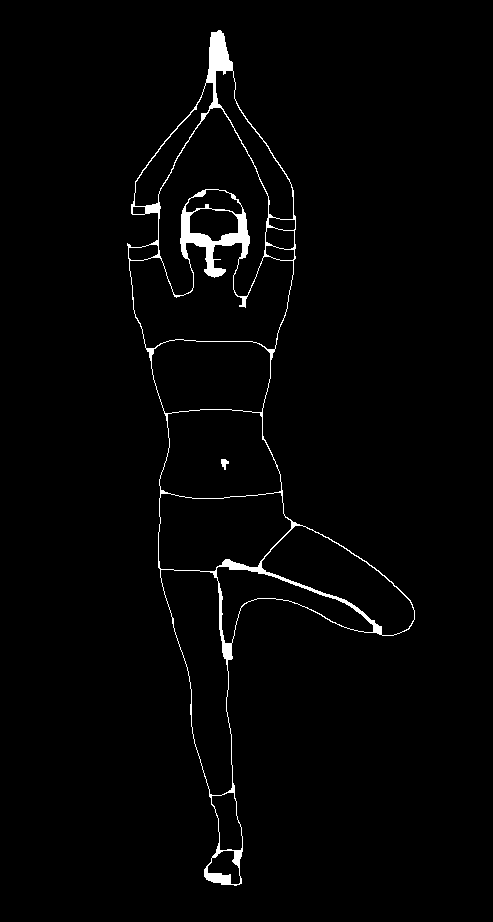

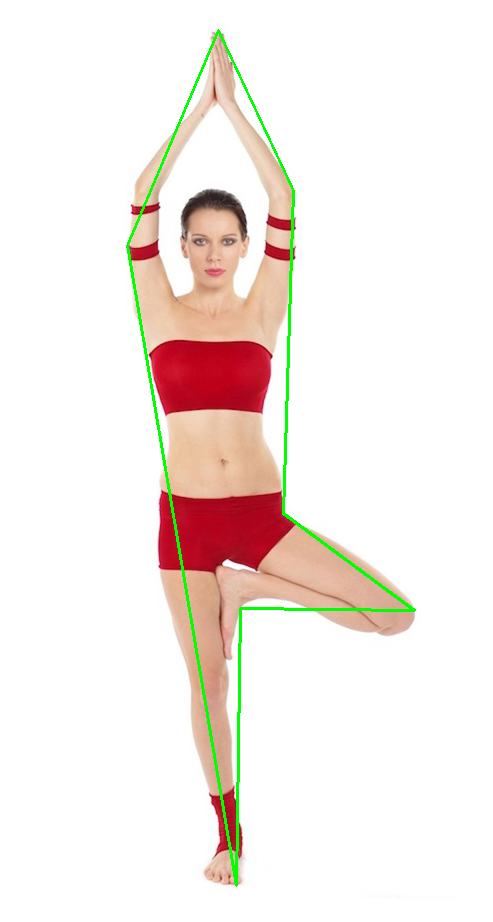

-1

In [1]:
import cv2
from google.colab.patches import cv2_imshow

#reading the image 
image = cv2.imread("/content/Vriksasana.jpg", cv2.IMREAD_UNCHANGED)
edged = cv2.Canny(image, 10, 250)
cv2_imshow(image)

cv2.waitKey(0)

#applying closing function 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)
cv2.waitKey(0)
 
#finding_contours 
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
for c in cnts:
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)


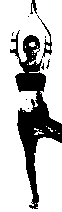

-1

In [6]:
import cv2
import numpy as np

# load image
img = cv2.imread('/content/Vriksasana.jpg') 
rsz_img = cv2.resize(img, None, fx=0.25, fy=0.25) # resize since image is huge
gray = cv2.cvtColor(rsz_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

# threshold to get just the signature
retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

# find where the signature is and make a cropped region
points = np.argwhere(thresh_gray==0) # find where the black pixels are
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

# get the thresholded crop
retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

# display
cv2_imshow(thresh_crop) 
cv2.waitKey(0)